In [45]:
%matplotlib inline
from itertools import chain
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import preprocessing
from collections import Counter
from utils import *

import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
train_file = "../data/train.csv"
test_file = "../data/test.csv"
sample_submission = "../data/sample_submission.csv"
submission_filename = "test_submission.csv"

In [8]:
train =pd.read_csv('../data/train.csv',delimiter=',')
test =pd.read_csv('../data/test.csv',delimiter=',')
train.head()

In [50]:
for feature in train.columns: # Loop through all columns in the dataframe
    if train[feature].dtype == 'object': # Only apply for columns with categorical strings
        train[feature] = pd.Categorical(train[feature]).codes # Replace strings with an integer
train.head()

many missing values in name, 2 type of animals(seperate?) too many bread

1. a little more dogs


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [47]:
for col in train.columns:
    print col, len(train[col].unique())
    #print train[col].describe()
    print '-' * 50

AnimalID 26729
--------------------------------------------------
Name 6375
--------------------------------------------------
DateTime 22918
--------------------------------------------------
OutcomeType 5
--------------------------------------------------
OutcomeSubtype 17
--------------------------------------------------
AnimalType 2
--------------------------------------------------
SexuponOutcome 6
--------------------------------------------------
AgeuponOutcome 45
--------------------------------------------------
Breed 1380
--------------------------------------------------
Color 366
--------------------------------------------------


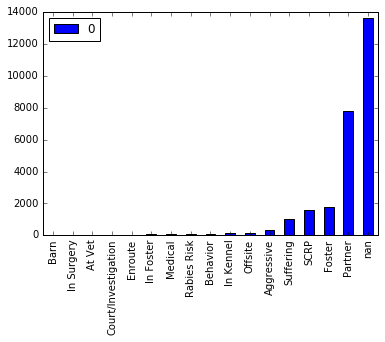

In [36]:
nb_counts = Counter(train.OutcomeSubtype)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')
plt.show()

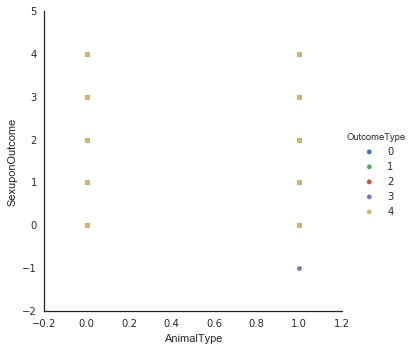

In [53]:
sns.FacetGrid(train, hue="OutcomeType", size=5)\
.map(plt.scatter, "AnimalType", "SexuponOutcome")\
.add_legend()

#g = sns.factorplot(x="AnimalType", y="SexuponOutcome", hue="OutcomeType", data=train)


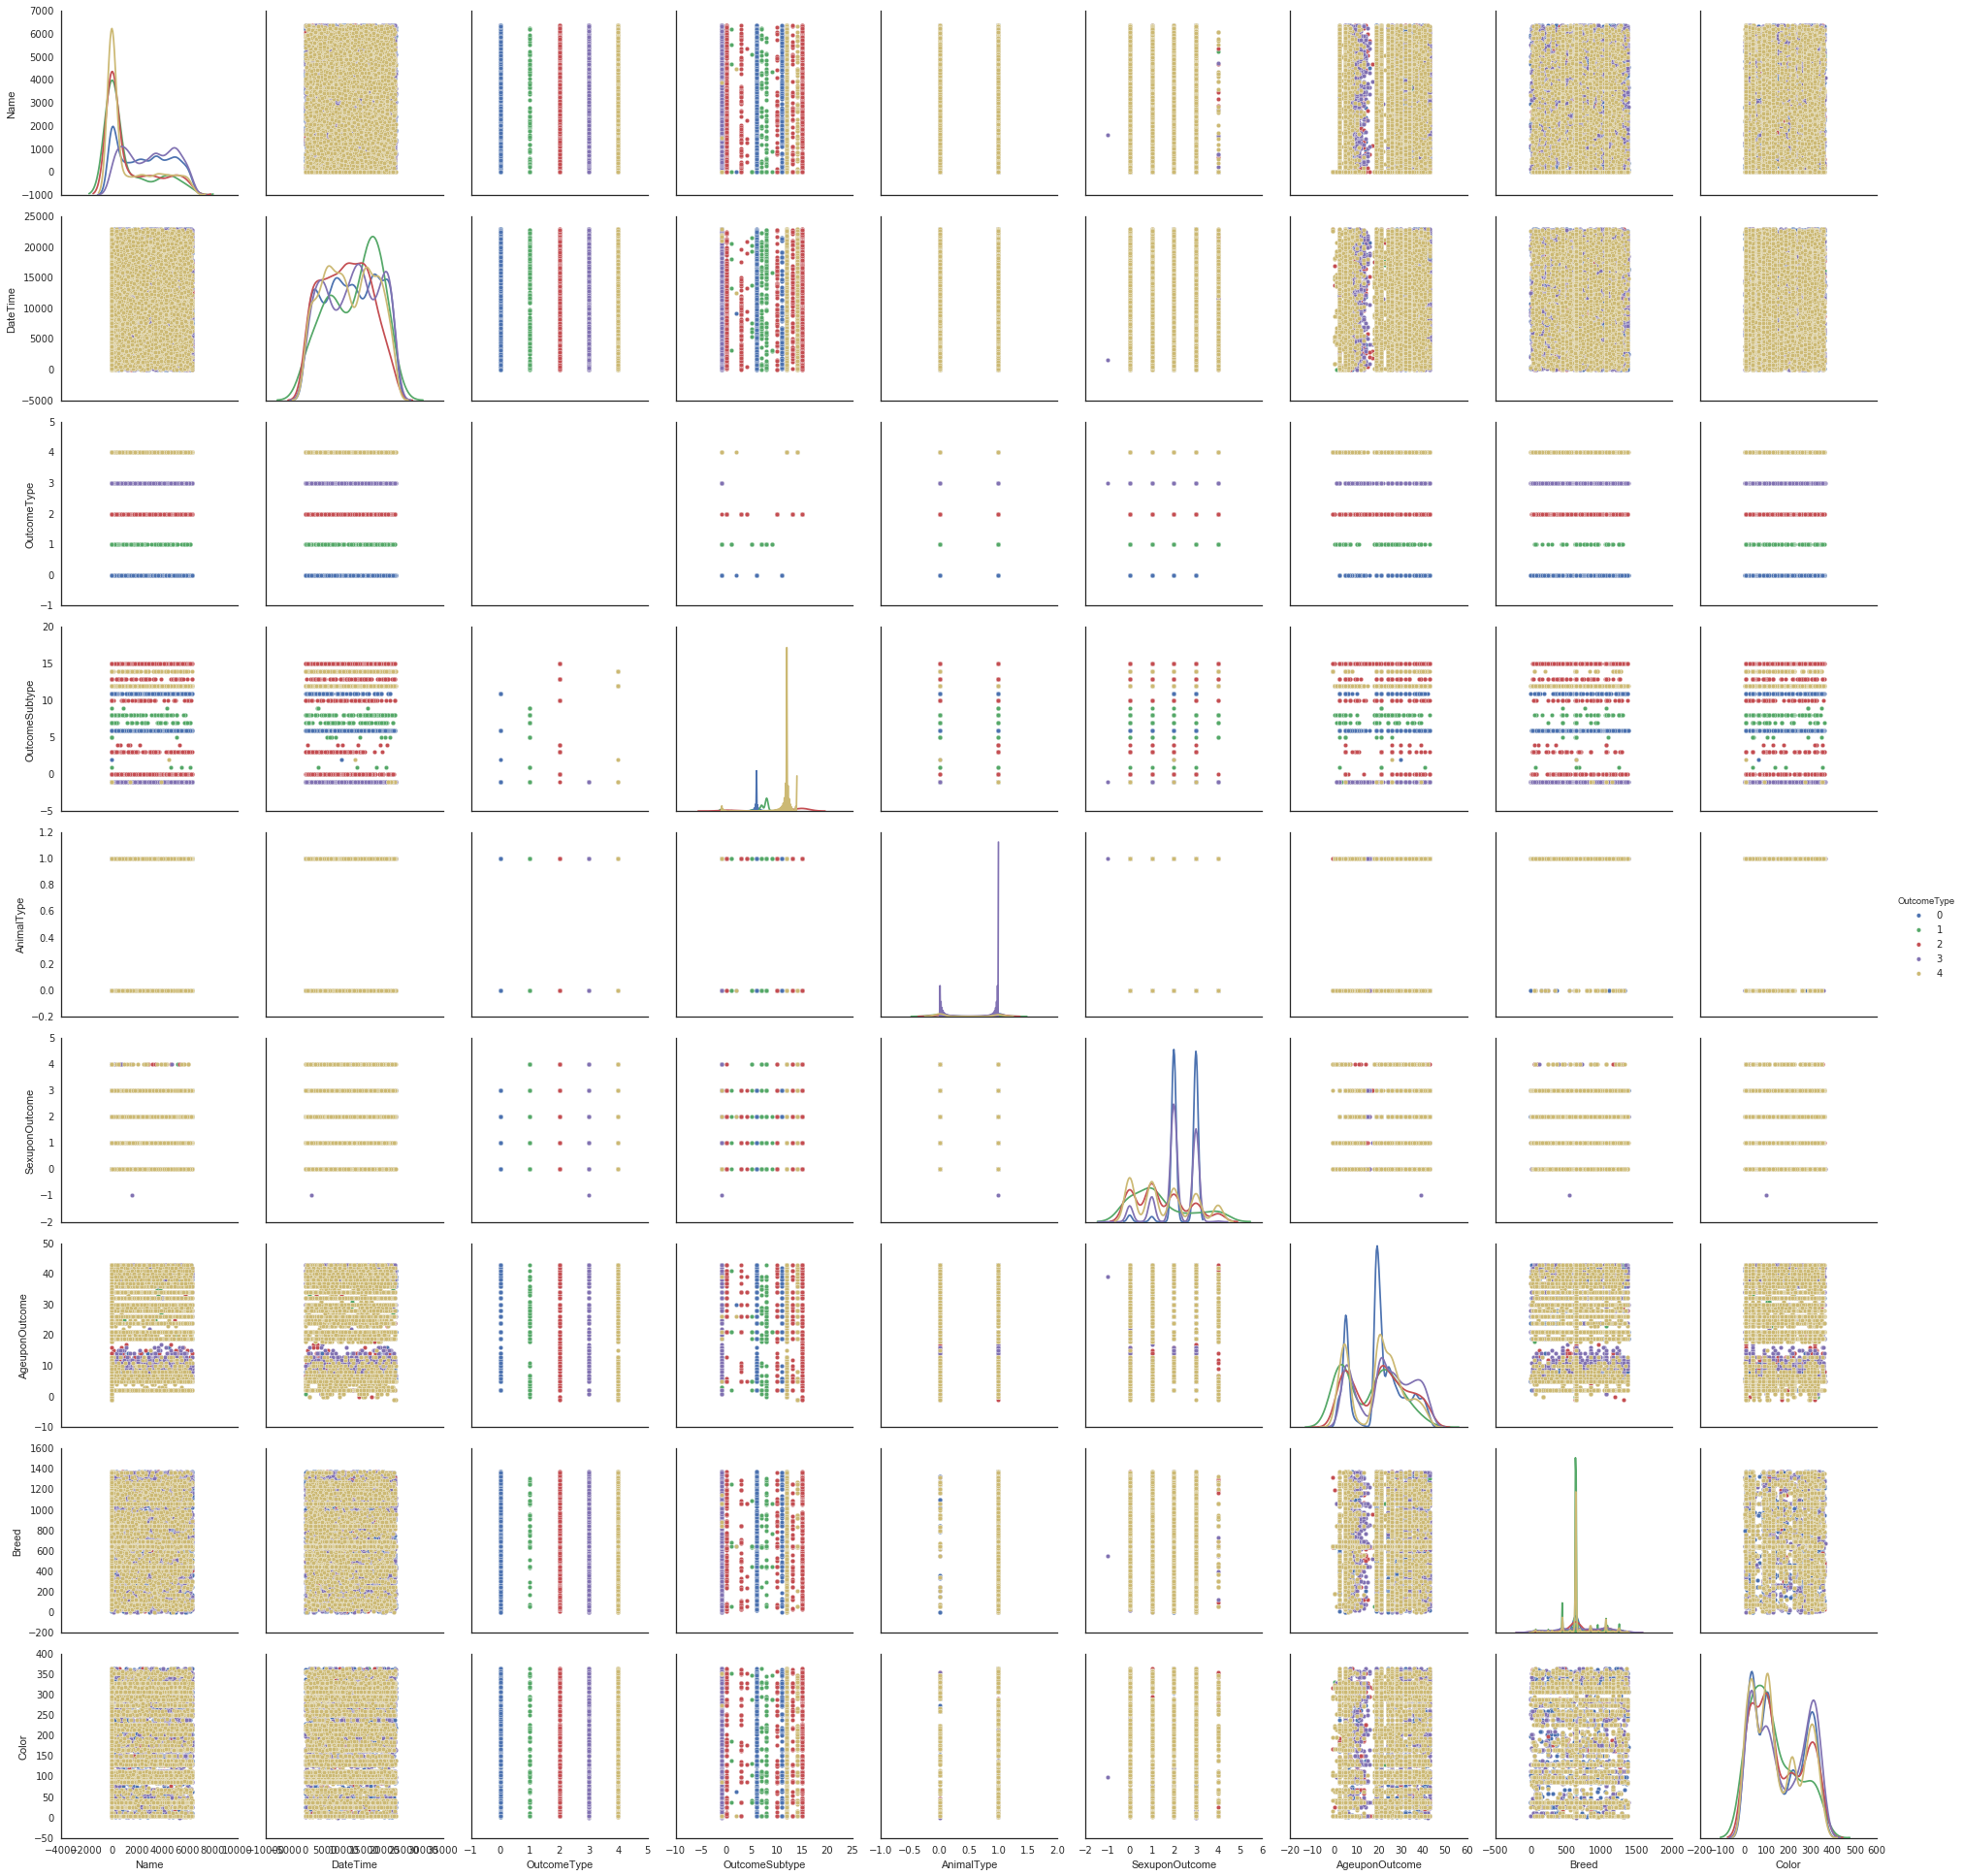

In [55]:
sns.pairplot(train.drop("AnimalID", axis=1), hue="OutcomeType", size=3, diag_kind="kde")